# importing

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(style="darkgrid")

In [2]:
global_temp_df = pd.read_csv('data/global_temp_df.csv')

In [3]:
co2_concentration_df = pd.read_csv('data/co2_concentration_df.csv')

In [4]:
global_temp_df.tail(13)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAverageTemperaturePlusUncertainty,LandAverageTemperatureMinusUncertainty
3179,2014-12-01,4.850,0.090,4.940,4.760
3180,2015-01-01,3.881,0.130,4.011,3.751
3181,2015-02-01,4.664,0.121,4.785,4.543
3182,2015-03-01,6.740,0.060,6.800,6.680
3183,2015-04-01,9.313,0.088,9.401,9.225
3184,2015-05-01,12.312,0.081,12.393,12.231
3185,2015-06-01,14.505,0.068,14.573,14.437
3186,2015-07-01,15.051,0.086,15.137,14.965
3187,2015-08-01,14.755,0.072,14.827,14.683
3188,2015-09-01,12.999,0.079,13.078,12.920


In [5]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [6]:
global_temp_df['dt'] = global_temp_df['dt'].apply(lambda x: x.replace(day=15))

In [7]:
global_temp_df.tail(13)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAverageTemperaturePlusUncertainty,LandAverageTemperatureMinusUncertainty
3179,2014-12-15,4.850,0.090,4.940,4.760
3180,2015-01-15,3.881,0.130,4.011,3.751
3181,2015-02-15,4.664,0.121,4.785,4.543
3182,2015-03-15,6.740,0.060,6.800,6.680
3183,2015-04-15,9.313,0.088,9.401,9.225
3184,2015-05-15,12.312,0.081,12.393,12.231
3185,2015-06-15,14.505,0.068,14.573,14.437
3186,2015-07-15,15.051,0.086,15.137,14.965
3187,2015-08-15,14.755,0.072,14.827,14.683
3188,2015-09-15,12.999,0.079,13.078,12.920


In [8]:
global_temp_df = global_temp_df.iloc[:,:2]

In [9]:
co2_concentration_df.head(13)

,datetime,datenum,year,month,day,data_mean_global,data_mean_nh,data_mean_sh
0,1677-10-15,612801,1677,10,15,275.003582,273.839462,276.167702
1,1677-11-15,612832,1677,11,15,276.008147,275.718717,276.297577
2,1677-12-15,612862,1677,12,15,276.645443,276.961625,276.329261
3,1678-01-15,612893,1678,1,15,277.105917,277.785137,276.426697
4,1678-02-15,612924,1678,2,15,277.488981,278.441322,276.536641
5,1678-03-15,612952,1678,3,15,277.830969,279.083912,276.578025
6,1678-04-15,612983,1678,4,15,278.071671,279.618665,276.524677
7,1678-05-15,613013,1678,5,15,278.016089,279.523139,276.509040
8,1678-06-15,613044,1678,6,15,277.284444,278.009847,276.559042
9,1678-07-15,613074,1678,7,15,275.645628,274.729535,276.561720


In [10]:
co2_concentration_df['datetime'] = co2_concentration_df['datetime'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
co2_concentration_df = co2_concentration_df.iloc[:,[0, -3]]

In [12]:
co2_concentration_df.set_index('datetime', inplace=True)

global_temp_df.set_index('dt', inplace=True)

In [13]:
global_temp_df.index.name = 'datetime'

In [14]:
global_temp_df

,LandAverageTemperature
datetime,
1750-01-15,3.034
1750-02-15,3.083
1750-03-15,5.626
1750-04-15,8.490
1750-05-15,11.573
...,...
2015-08-15,14.755
2015-09-15,12.999
2015-10-15,10.801


In [15]:
co2_concentration_df

,data_mean_global
datetime,
1677-10-15,275.003582
1677-11-15,276.008147
1677-12-15,276.645443
1678-01-15,277.105917
1678-02-15,277.488981
...,...
2014-08-15,394.573461
2014-09-15,395.026810
2014-10-15,396.668760


In [16]:
year_1900 = datetime.datetime.strptime('1900-01-01', '%Y-%m-%d')

In [17]:
co2_temp = pd.merge(global_temp_df, co2_concentration_df, left_on='datetime', right_on='datetime')

In [18]:
co2_temp

,LandAverageTemperature,data_mean_global
datetime,,
1750-01-15,3.034,277.813529
1750-02-15,3.083,278.196558
1750-03-15,5.626,278.538475
1750-04-15,8.490,278.779124
1750-05-15,11.573,278.723560
...,...,...
2014-08-15,14.875,394.573461
2014-09-15,13.091,395.026810
2014-10-15,10.330,396.668760


In [66]:
co2_temp.describe()

,LandAverageTemperature,data_mean_global
count,3180.000000,3180.000000
mean,8.363821,302.629178
std,4.375157,28.995168
min,-2.080000,274.713491
25%,4.321750,281.932560
50%,8.584500,290.084822
75%,12.535250,313.106777
max,19.021000,399.179692


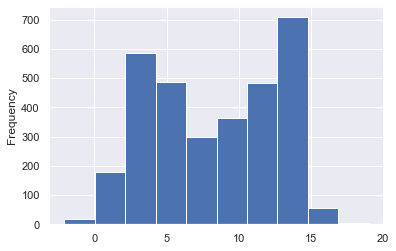

In [71]:
co2_temp['LandAverageTemperature'].plot.hist()

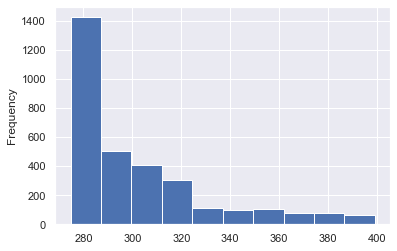

In [72]:
co2_temp['data_mean_global'].plot.hist()

In [80]:
corrSeries = co2_temp['data_mean_global'].rolling(window=12).corr(co2_temp['LandAverageTemperature'])

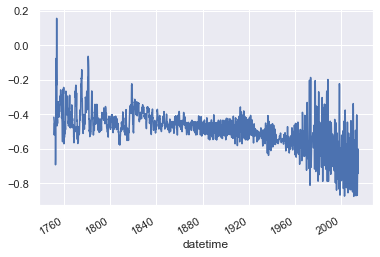

In [81]:
corrSeries.plot()

In [75]:
co2_temp['data_mean_global'].corr(co2_temp['LandAverageTemperature'])

0.07179466520504942

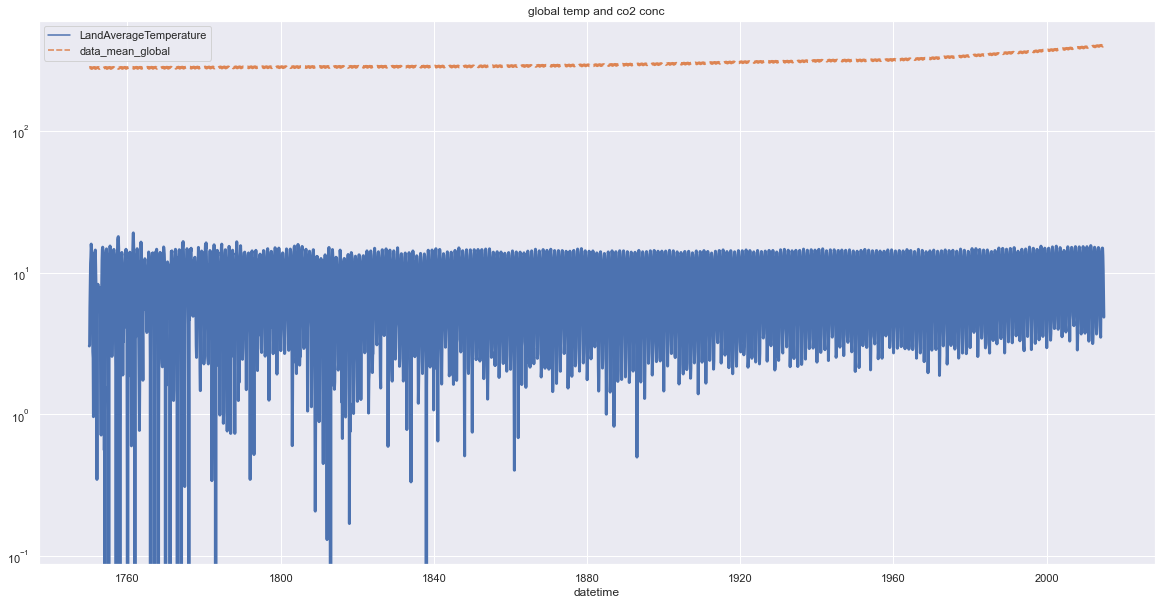

In [82]:
plt.subplots(figsize=(20,10))

plt.title('global temp and co2 conc')

ax = sns.lineplot(data=co2_temp,ci=40, lw=3)

#ax.set(xlabel='Year', ylabel='Land Average Temperature (ºC)')

#plt.savefig('co2_temp.pdf')

plt.show()